Importing the dependencies

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

Data Collection and Pre-processing

In [2]:
customer_data = pd.read_csv("/content/Mall_Customers.csv")

In [3]:
customer_data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
customer_data.shape

(200, 5)

In [5]:
customer_data.isnull().sum()

,0
CustomerID,0
Gender,0
Age,0
Annual Income (k$),0
Spending Score (1-100),0


In [6]:
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [8]:
# Choosing the annual income and spending score column

X = customer_data[["Annual Income (k$)", "Spending Score (1-100)"]]

In [9]:
print(X)

     Annual Income (k$)  Spending Score (1-100)
0                    15                      39
1                    15                      81
2                    16                       6
3                    16                      77
4                    17                      40
..                  ...                     ...
195                 120                      79
196                 126                      28
197                 126                      74
198                 137                      18
199                 137                      83

[200 rows x 2 columns]


In [10]:
X.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


Choosing  the number of clusters using WCSS (Within clusters sum of square)

In [11]:
wcss = []

for i in range(1,11):
  kmeans = KMeans(n_clusters=i, init="k-means++", random_state = 42)
  kmeans.fit(X)

  wcss.append(kmeans.inertia_)


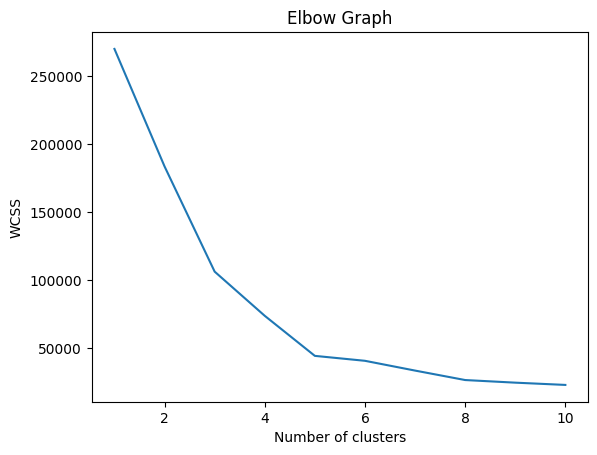

In [12]:
# plot an elbow graph

sns.set_theme
plt.plot(range(1,11),wcss)
plt.title("Elbow Graph")
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.show()

The optimum number of clusters sill be 5 because after 5 their si no significant drop

Training the model

In [14]:
kmeans = KMeans(n_clusters=5, init="k-means++", random_state=42)

# return label for each datapoint based on their cluster
Y = kmeans.fit_predict(X)

print(Y)

[4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4
 2 4 2 4 2 4 0 4 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 3 1 0 1 3 1 3 1 0 1 3 1 3 1 3 1 3 1 0 1 3 1 3 1
 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3
 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1]


Visualizing the clusters

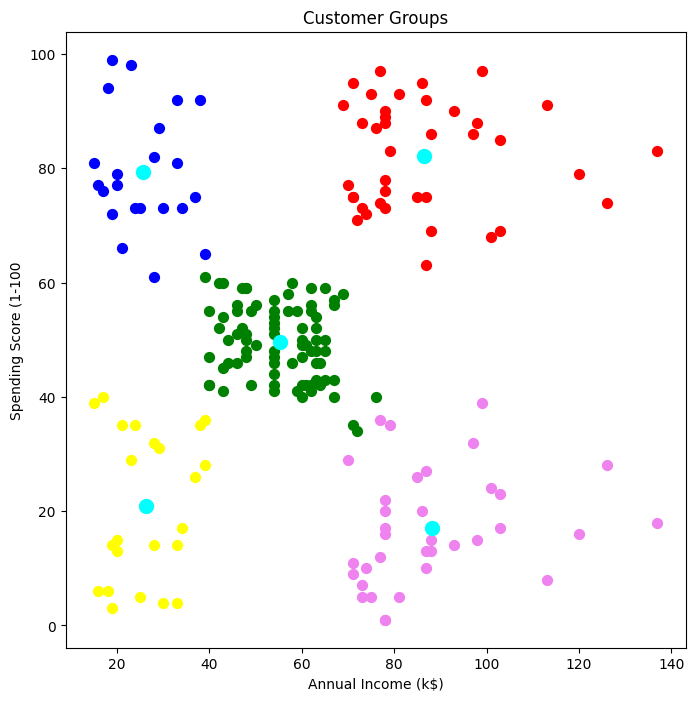

In [18]:
plt.figure(figsize=(8,8))
plt.scatter(X[Y==0]['Annual Income (k$)'], X[Y==0]['Spending Score (1-100)'], s = 50, c = 'green', label = 'Cluster 1')
plt.scatter(X[Y==1]['Annual Income (k$)'], X[Y==1]['Spending Score (1-100)'], s = 50, c = 'red', label = 'Cluster 2')
plt.scatter(X[Y==2]['Annual Income (k$)'], X[Y==2]['Spending Score (1-100)'], s = 50, c = 'blue', label = 'Cluster 3')
plt.scatter(X[Y==3]['Annual Income (k$)'], X[Y==3]['Spending Score (1-100)'], s = 50, c = 'violet', label = 'Cluster 4')
plt.scatter(X[Y==4]['Annual Income (k$)'], X[Y==4]['Spending Score (1-100)'], s = 50, c = 'yellow', label = 'Cluster 5')

plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s = 100, c = 'cyan', label = 'Centroids')

plt.title("Customer Groups")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100")
plt.show()